<a href="https://colab.research.google.com/github/Data-Science-and-Data-Analytics-Courses/MITx---Machine-Learning-with-Python-From-Linear-Models-to-Deep-Learning-Jun-11-2019/blob/master/Project%202%3A%20Digit%20recognition%20(Part%201)/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction Using PCA



---



## Setup

Cloning into '/nblib'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 32 (delta 15), reused 7 (delta 2), pack-reused 0
Unpacking objects: 100% (32/32), done.


importing Jupyter notebook from /nblib/Git.ipynb
Cloning into '/content/MITx---Machine-Learning-with-Python-From-Linear-Models-to-Deep-Learning-Jun-11-2019'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 868 (delta 123), reused 0 (delta 0), pack-reused 705
Receiving objects: 100% (868/868), 48.26 MiB | 14.20 MiB/s, done.
Resolving deltas: 100% (465/465), done.
importing Jupyter notebook from /content/MITx---Machine-Learning-with-Python-From-Linear-Models-to-Deep-Learning-Jun-11-2019/setup/Setup.ipynb


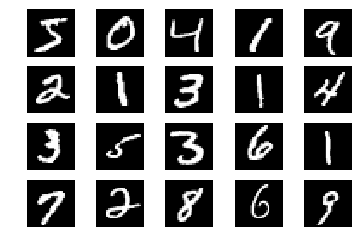

In [1]:
import os, sys
from pathlib import Path

# Notebook Library
url = "https://github.com/Data-Science-and-Data-Analytics-Courses/Notebook-Library"
repo = Path("/nblib")
!git clone "{url}" "{repo}"
if repo.parent.as_posix() not in sys.path:
  sys.path.append(repo.parent.as_posix())
%run "{repo}/.Importable.ipynb"

from nblib import Git
# Remote
URL = "https://github.com/Data-Science-and-Data-Analytics-Courses/MITx---Machine-Learning-with-Python-From-Linear-Models-to-Deep-Learning-Jun-11-2019"
REPO = Git.clone(URL, dest="/content")
if REPO.as_posix() not in sys.path:
  sys.path.append(REPO.as_posix())

# Working directory, for running modules in part1
part1dir = REPO / "Project 2: Digit recognition (Part 1)/mnist/part1"
os.chdir(part1dir)

from setup.Setup import *
import main, features, test

## Testing PCA


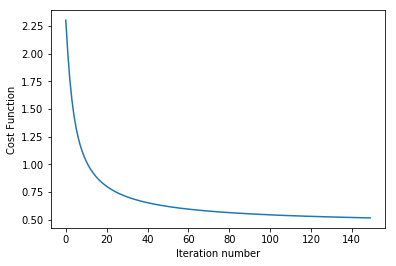

0.1483

In [2]:
# 18-dimensional PCA features
main.run_softmax_on_MNIST_pcs(temp_parameter=1)

Use plot_PC in main.py to visualize the first 100 MNIST images, as represented in the space spanned by the first 2 principal components of the training data.



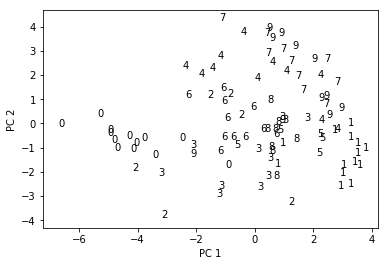

In [2]:
train_x = main.train_x
train_y = main.train_y
features.plot_PC(train_x[range(100),], main.pcs, train_y[range(100)])

## Cubic Features
In this section, we will work with a cubic feature mapping which maps an input vector  x=[x1,…,xd]  into a new feature vector  ϕ(x) , defined so that for any  x,x′∈Rd :

$$
\phi (x)^ T \phi (x') = (x^ T x' + 1)^3
$$



### Computing Cubic Features
In 2-D, let  x=[x1,x2] . Write down the explicit cubic feature mapping  ϕ(x)  as a vector; i.e.,  ϕ(x)=[f1(x1,x2),⋯,fN(x1,x2)]  


In [49]:
x1 = sym.Matrix(sym.symarray('x', (1, 2)))
x2 = sym.Matrix(sym.symarray('x`', (1, 2)))
sym.pprint(x1)
sym.pprint(x2)

x1Tx2 = (x1*x2.T)[0, 0]
expr = (x1Tx2 + 1)**3 # ϕ(x)Tϕ(x′)
sym.pprint(sym.expand(expr))

print("ϕ(x)")
phix = sym.Matrix()
sym.pprint([x1[0,0]**3, sym.sqrt(3)*x1[0,0]**2*x1[0,1], sym.sqrt(3)*x1[0,0]**2,
                   sym.sqrt(3)*x1[0,0]*x1[0,1]**2, sym.sqrt(6)*x1[0,0]*x1[0,1], 
                   sym.sqrt(3)*x1[0,0], x1[0,1]**3, sym.sqrt(3)*x1[0,1]**2, sym.sqrt(3)*x1[0,1], 1])

[x₀ ₀  x₀ ₁]
[x`₀ ₀  x`₀ ₁]
    3      3         2           2               2      2              2      
x₀ ₀ ⋅x`₀ ₀  + 3⋅x₀ ₀ ⋅x₀ ₁⋅x`₀ ₀ ⋅x`₀ ₁ + 3⋅x₀ ₀ ⋅x`₀ ₀  + 3⋅x₀ ₀⋅x₀ ₁ ⋅x`₀ ₀

      2                                                3      3         2     
⋅x`₀ ₁  + 6⋅x₀ ₀⋅x₀ ₁⋅x`₀ ₀⋅x`₀ ₁ + 3⋅x₀ ₀⋅x`₀ ₀ + x₀ ₁ ⋅x`₀ ₁  + 3⋅x₀ ₁ ⋅x`₀ 

 2                   
₁  + 3⋅x₀ ₁⋅x`₀ ₁ + 1
ϕ(x)
⎡    3         2              2              2                             3  
⎣x₀ ₀ , √3⋅x₀ ₀ ⋅x₀ ₁, √3⋅x₀ ₀ , √3⋅x₀ ₀⋅x₀ ₁ , √6⋅x₀ ₀⋅x₀ ₁, √3⋅x₀ ₀, x₀ ₁ , 

       2            ⎤
√3⋅x₀ ₁ , √3⋅x₀ ₁, 1⎦
